In [ ]:
Обрахуємо коефіцієнт еластичності для певної моделі за допомогою лінійної регресії

In [1]:
%matplotlib inline
from Visualization import give_data, give_models_tree
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def elasticity_ols(data, give_info=False):# будує лінійну регресію відносно dataframe: Quantity ~ PriceUSD 
    linreg = smf.ols('Quantity ~ PriceUSD', data=data).fit()
    if give_info:
        print(linreg.summary())
        sns.set()
        print(1)
        fig1 = plt.figure(figsize=(12,8))
        print(2)
        fig2 = plt.figure(figsize=(12, 8))
        fig3 = plt.figure(figsize=(12,8))
        fig1 = sm.graphics.plot_partregress_grid(linreg, fig=fig1)
        fig2 = sm.graphics.plot_ccpr_grid(linreg, fig=fig2)
        fig3 = sm.graphics.plot_regress_exog(linreg, 'PriceUSD', fig=fig3)
        plt.show()
    return linreg.params.PriceUSD

In [3]:
def elasticity_ols_models(data, models, give_info=False, correct_length_of_sales=9):# знаходить эластичність по всіх моделях у models
    d = data[data['Model'].isin(models)]
    res = {}
    for j in d.Model.unique():
        d2 = d[d['Model'] == j]
        if (data[data['Model'] == j]).shape[0] >= correct_length_of_sales:
            try:
                res[j] = elasticity_ols(d2, give_info)
            except Exception:
                pass
    return pd.DataFrame.from_dict({'Model' : list(res.keys()), 'Elasticity' : list(res.values())})

In [4]:
data = give_data()
data2 = data[data['Source'] == 'Traditional Sales']
model_tree = give_models_tree(data2)

c:\users\zelen\desktop\python projects\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.136
Date:                Fri, 24 Jan 2020   Prob (F-statistic):              0.312
Time:                        11:23:54   Log-Likelihood:                -57.816
No. Observations:                  12   AIC:                             119.6
Df Residuals:                      10   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.4147     67.666      1.425      0.1

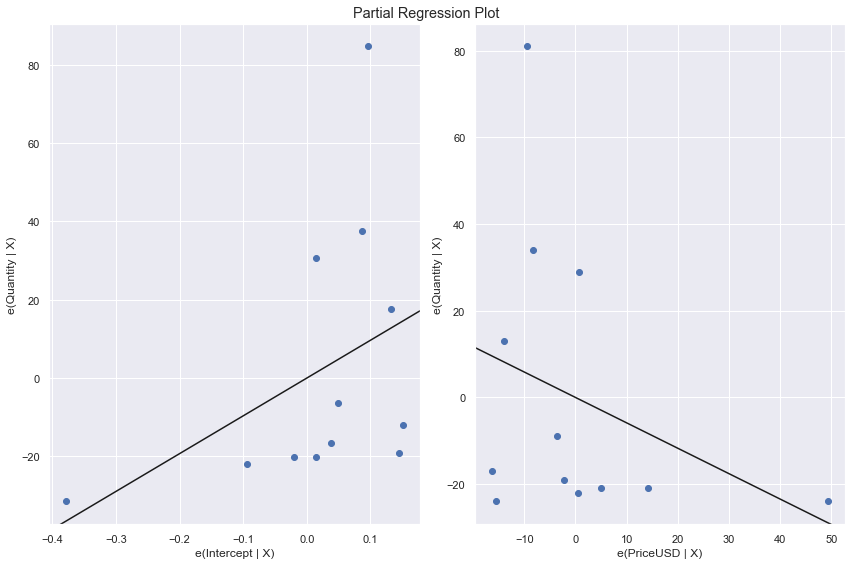

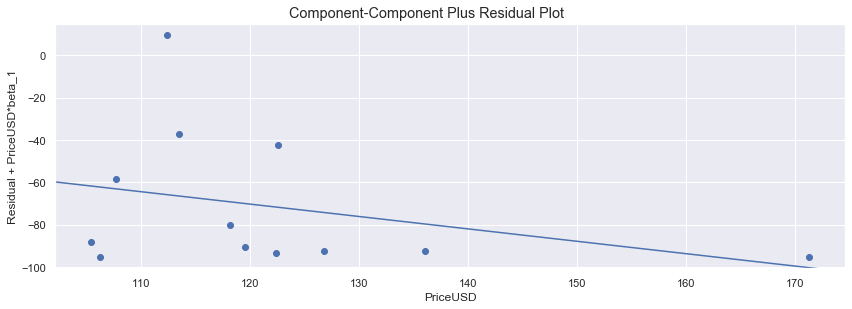

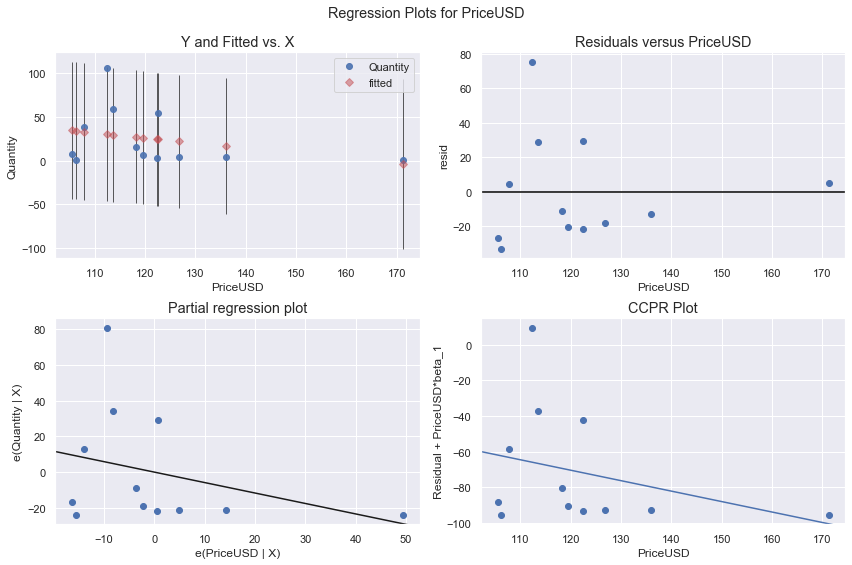

,Model,Elasticity
0,TRADEBRAND,-0.58604


In [5]:
elasticity_ols_models(data2, model_tree['TRADEBRAND'], give_info=True)

In [6]:
elasticity_ols_models(data2, model_tree['SAMSUNG'])

,Model,Elasticity
0,RB37J5000SA/UA,-0.504816
1,RB37J5000EF/UA,0.455472
2,RB33J3000SA,-2.767178
3,RB37J5220SA,-0.748785
4,RB30J3000SA,2.876504
...,...,...
65,RB34N5291SL/UA,-0.082553
66,RB34N5440B1/UA,-0.901621
67,RB34N5440EF/UA,-0.998432
68,RB34N5291EF/UA,-0.032461


In [ ]:
Обчислення еластичності по группам товарів будуть додані після кластерного аналізу